<a href="https://colab.research.google.com/github/IBM-EPBL/IBM-Project-23121-1659867360/blob/main/Assessments/Team%20Leader%20(Priyadharshini%20S)/Priyadharshini_S_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement: Abalone Age Prediction**

###**Description :**
*Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.*

## **Download and Load Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as rcParams

In [ ]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
Age = df.Rings + 1.5
df['Age']=Age
df = df.drop(columns=['Rings'],axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [ ]:
df = df.rename(columns = {'Whole weight': 'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                          'Shell weight': 'Shell_weight'})

In [ ]:
df.shape

(4177, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [ ]:
df.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [ ]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

## **Visualizations**

 **Univariate Analysis**

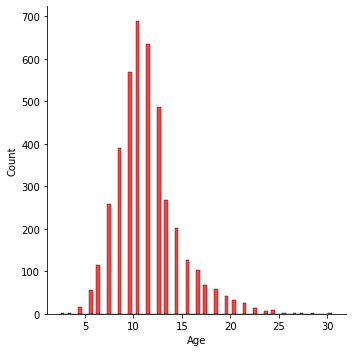

In [ ]:
sns.displot(df.Age,color='Red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Lenght')

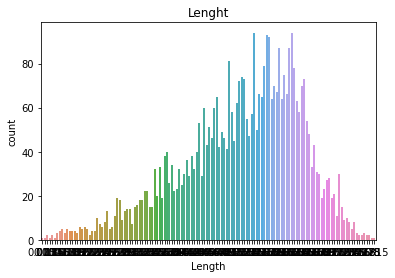

In [ ]:
sns.countplot(df.Length)
plt.title('Lenght')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


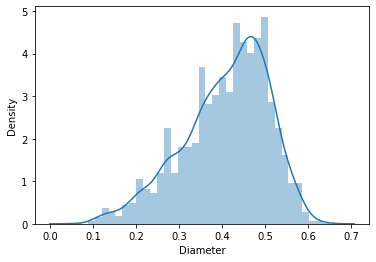

In [ ]:
sns.distplot(df.Diameter)

 **Bi-Variate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'ScatterPlot')

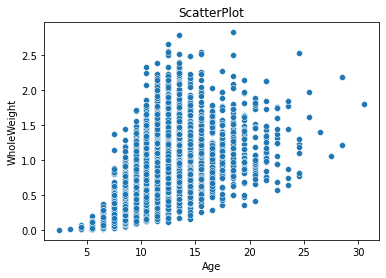

In [ ]:
sns.scatterplot(df.Age,df.Whole_weight)
plt.xlabel('Age')
plt.ylabel('WholeWeight')
plt.title('ScatterPlot')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


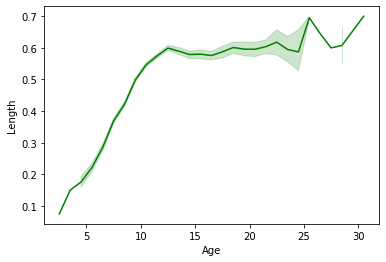

In [ ]:
sns.lineplot(df.Age,df.Length,color='Green')

<BarContainer object of 4177 artists>

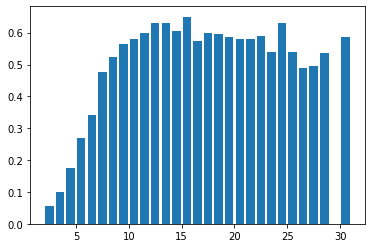

In [ ]:
plt.bar(df.Age,df.Diameter)

 **Multi-Variate Analysis**    

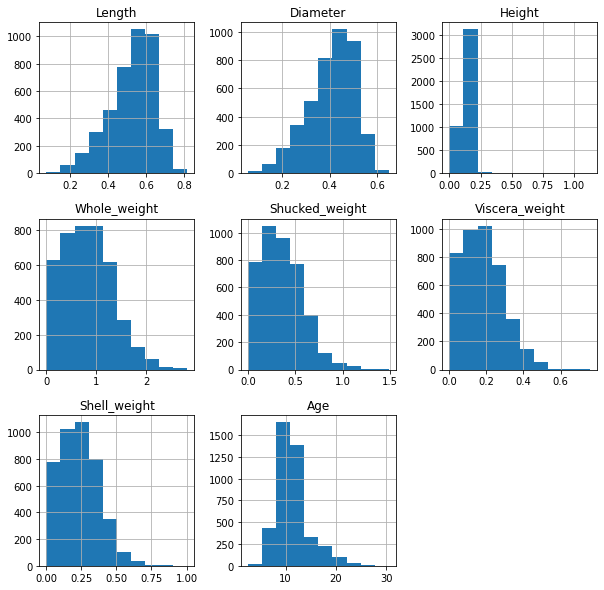

In [ ]:
multi=df.hist(figsize=(10,10))

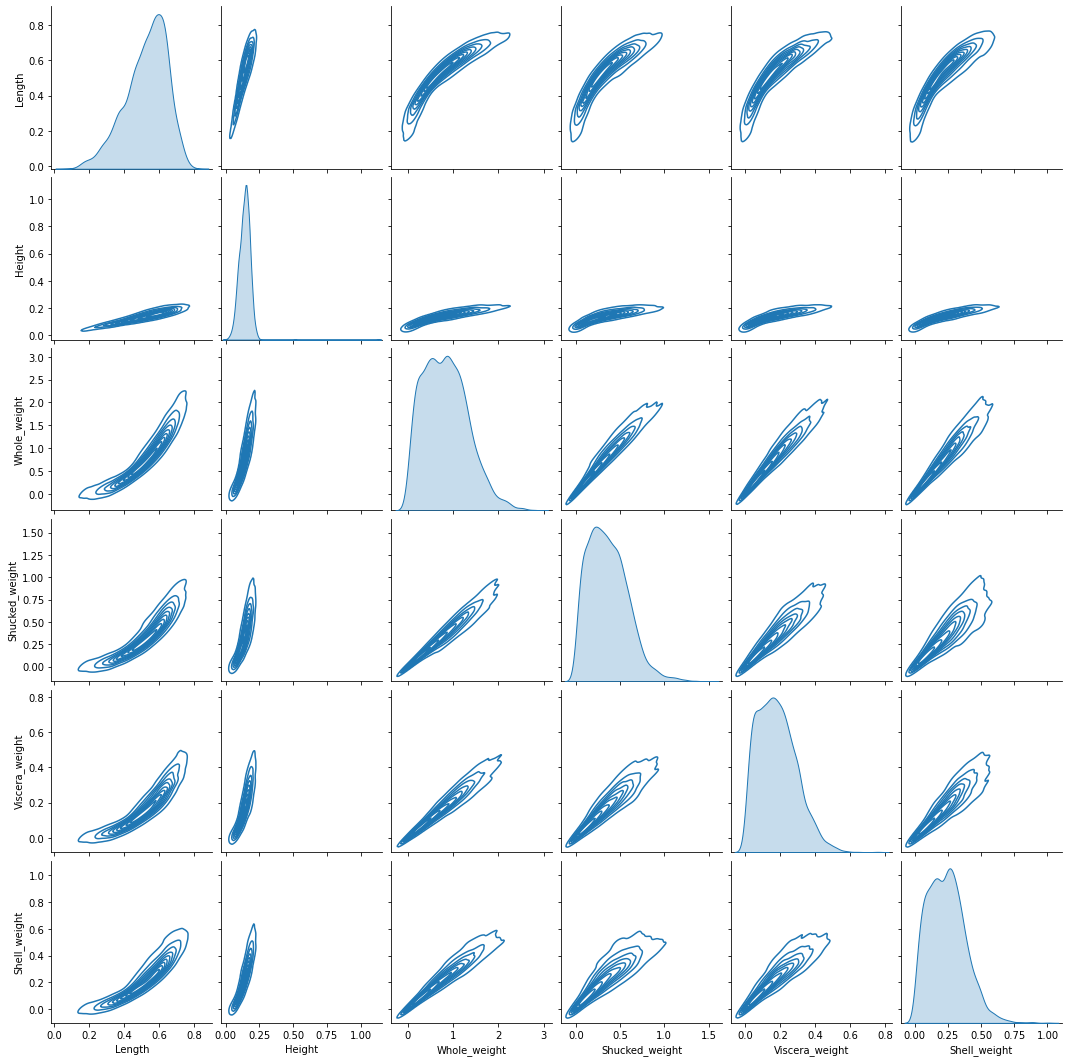

In [ ]:
sns.pairplot(data=df[['Length','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']],kind='kde')

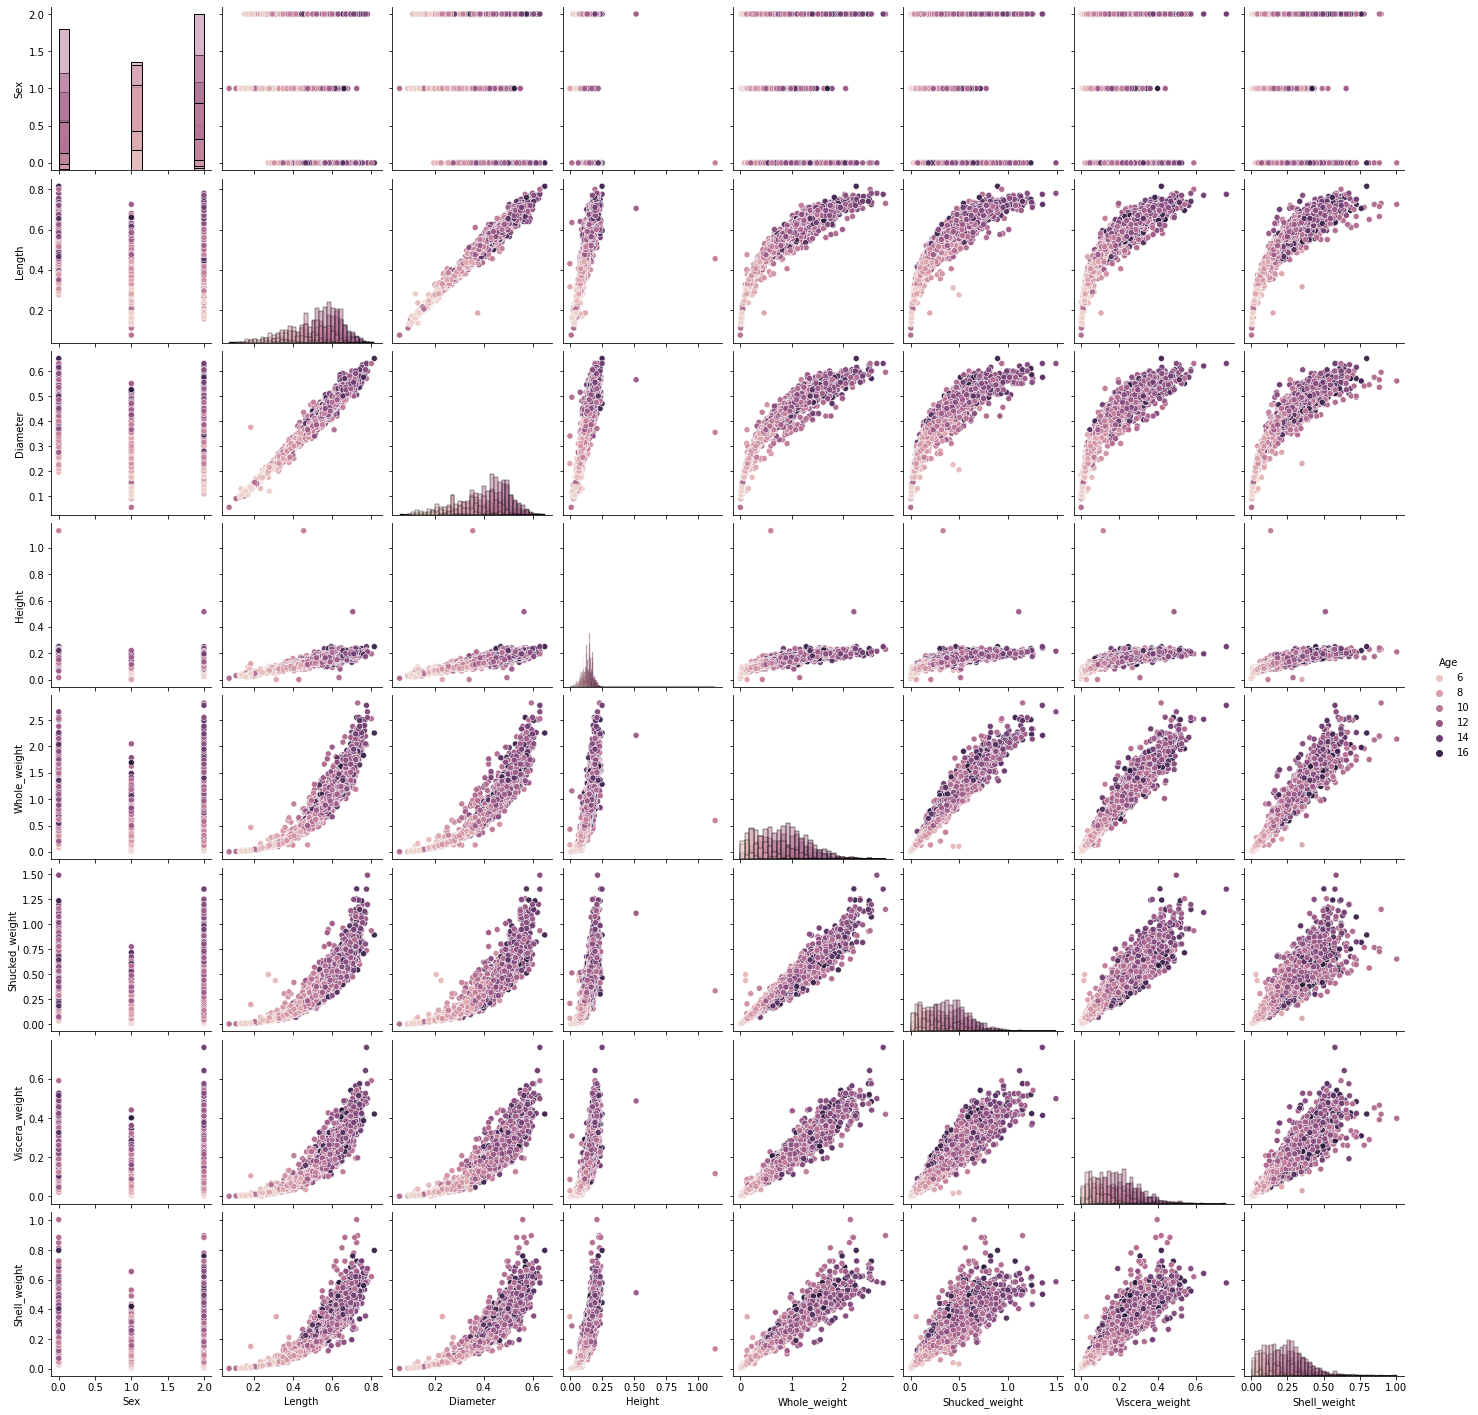

In [529]:
sns.pairplot(df,hue='Age',diag_kind='hist')

# **Descriptive statistics**

In [ ]:
df.describe()    

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


# **Handle missing data**

In [ ]:
df.isnull().any()    #no missing data

Sex               False
Length            False
Diameter          False
Height            False
Whole_weight      False
Shucked_weight    False
Viscera_weight    False
Shell_weight      False
Age               False
dtype: bool

#**Outliers Replacement**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


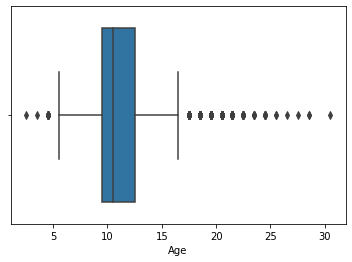

In [ ]:
sns.boxplot(df.Age)

In [ ]:
q1=df.Age.quantile(0.25)
q3=df.Age.quantile(0.75)

In [ ]:
IQR = q3-q1

In [ ]:
upper_limit=q3 + 1.5 * IQR
lower_limit=q1 - 1.5 * IQR

In [ ]:
upper_limit,lower_limit

(17.0, 5.0)

In [ ]:
df.Age.median()

10.5

In [ ]:
df.Age=np.where(df.Age>upper_limit,10.5,df.Age) #Median=10.5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


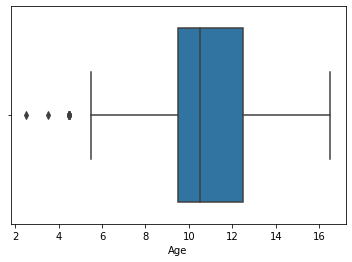

In [ ]:
sns.boxplot(df.Age)

In [ ]:
df.Age=np.where(df.Age<lower_limit,10.5,df.Age) #Median=10.5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


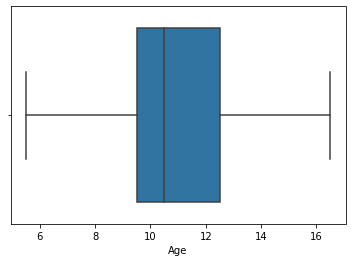

In [ ]:
sns.boxplot(df.Age)

# **Check for Categorical column and perform encoding**

**Label Encoding for Gender column**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df.Sex=le.fit_transform(df.Sex)

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# **Split the data into dependent and independent variables**

In [ ]:
#y - target columns
#X - predicting columns

In [ ]:
y=df['Age']
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

In [ ]:
X=df.drop(columns=['Age'],axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


# **Scale the independent variables**

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
df2=pd.DataFrame(scale(X),columns=X.columns)
df2.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1.151980,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,1.151980,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,-1.280690,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,1.151980,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-0.064355,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757


# **Split the data into training and testing**


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df2,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape,X_test.shape

((2923, 8), (1254, 8))

In [ ]:
y_train.shape,y_test.shape

((2923,), (1254,))

# **Build the model**



In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression() #Linear Regression Model

In [ ]:
from sklearn.linear_model import Ridge
r=Ridge() #Ridge Regression Model

In [ ]:
from sklearn.linear_model import Lasso
l=Lasso() #Lasso Regression Model

# **Train the model**


In [ ]:
lr.fit(X_train,y_train) #Training lr model

LinearRegression()

In [ ]:
pred1_train=lr.predict(X_train)
pred1_train  

array([11.37532295, 10.8623978 , 10.98473747, ...,  8.47235413,
       10.0771839 ,  8.2997195 ])

In [ ]:
r.fit(X_train,y_train) #Training r model

Ridge()

In [ ]:
pred2_train=r.predict(X_train)
pred2_train

array([11.37024121, 10.86610153, 10.98923414, ...,  8.47158189,
       10.08029538,  8.29939996])

In [ ]:
l.fit(X_train,y_train) #Training l model

Lasso()

In [ ]:
pred3_train=l.predict(X_train)
pred3_train

array([10.90661081, 10.94589013, 10.96552979, ..., 10.19958302,
       10.86733149, 10.14066404])

# **Test the model**

In [ ]:
y_test

17      11.5
1131     9.5
299     10.5
1338    11.5
2383    10.5
        ... 
802     10.5
3016     8.5
2886     9.5
2580     9.5
2814     5.5
Name: Age, Length: 1254, dtype: float64

In [ ]:
pred1=lr.predict(X_test)
pred1                    #Testing data using linear regression model

array([ 9.82570208, 10.03404396,  9.28563548, ..., 10.0965599 ,
       10.66920195,  7.77742412])

In [ ]:
pred2=r.predict(X_test)
pred2                   #Testing data using ridge model

array([ 9.82297354, 10.04038957,  9.28565669, ..., 10.10174311,
       10.66576784,  7.77789848])

In [522]:
pred3=l.predict(X_test)
pred3                    #Testing data using lasso model

array([10.59237624, 10.96552979, 10.35670031, ..., 10.69057454,
       10.92625047, 10.04246574])

In [523]:
age_pred = pd.DataFrame({'Actual_value':y_test,'Predicted_value_using_lr':pred1,'Predicted_value_using_r':pred2,'Predicted_value_using_l':pred3})
age_pred.head()

,Actual_value,Predicted_value_using_lr,Predicted_value_using_r,Predicted_value_using_l
17,11.5,9.825702,9.822974,10.592376
1131,9.5,10.034044,10.040390,10.965530
299,10.5,9.285635,9.285657,10.356700
1338,11.5,11.109891,11.111671,11.044088
2383,10.5,10.901944,10.905969,10.788773


# **Measure the performance using metrics**


In [524]:
from sklearn import metrics

In [525]:
#R2-square
#Testing accuracy of linear regression, ridge, lasso

print(metrics.r2_score(y_test,pred1))
print(metrics.r2_score(y_test,pred2))
print(metrics.r2_score(y_test,pred3))

0.4162940378151394
0.41640627795250973
0.17272068414915298


In [526]:
#R2-square
#Training accuracy of linear regression, ridge, lasso

print(metrics.r2_score(y_train,pred1_train))
print(metrics.r2_score(y_train,pred2_train))
print(metrics.r2_score(y_train,pred3_train))


0.40173116413670873
0.40172280022100826
0.17472314547809642


In [527]:
## MSE(Mean square error)
#Testing accuracy of linear regression, ridge, lasso

print(metrics.mean_squared_error(y_test,pred1))
print(metrics.mean_squared_error(y_test,pred2))
print(metrics.mean_squared_error(y_test,pred3))

3.066910254318059
3.0663205217291396
4.346694365552255


In [528]:
## RMSE
#Testing accuracy of linear regression, ridge, lasso


print(np.sqrt(metrics.mean_squared_error(y_test,pred1)))
print(np.sqrt(metrics.mean_squared_error(y_test,pred2)))
print(np.sqrt(metrics.mean_squared_error(y_test,pred3)))

1.751259619336339
1.7510912374085879
2.084872745649541
